# Medical Cost Personal Insurance Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from warnings import filterwarnings
filterwarnings(action='ignore')

In [34]:
Insurance = pd.read_csv("Downloads\medical_cost_insurance.csv")


In [35]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
Insurance.shape

(1338, 7)

In [37]:
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

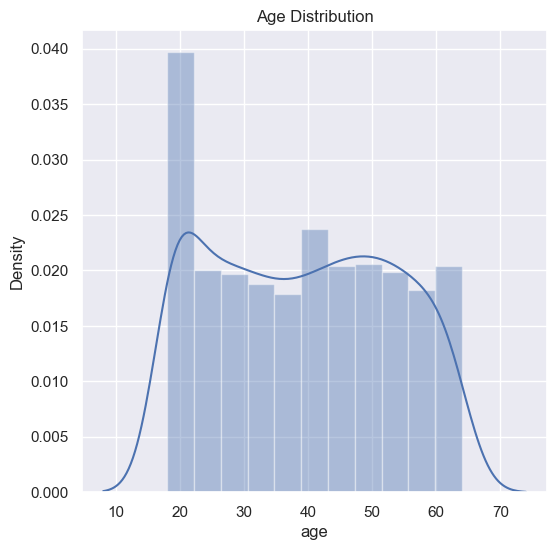

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Insurance['age'])
plt.title('Age Distribution')
plt.show()

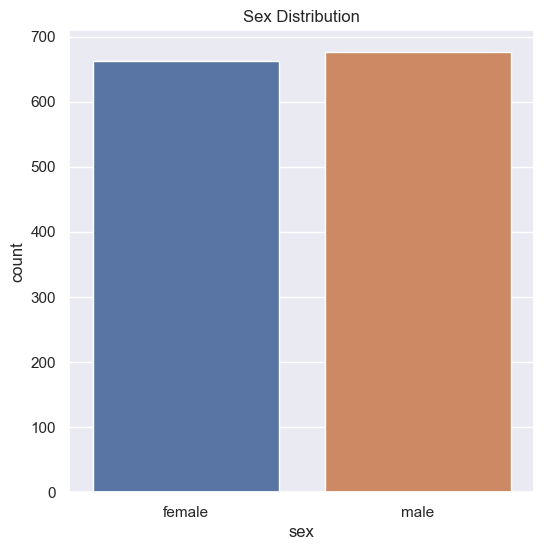

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=Insurance)
plt.title('Sex Distribution')
plt.show()

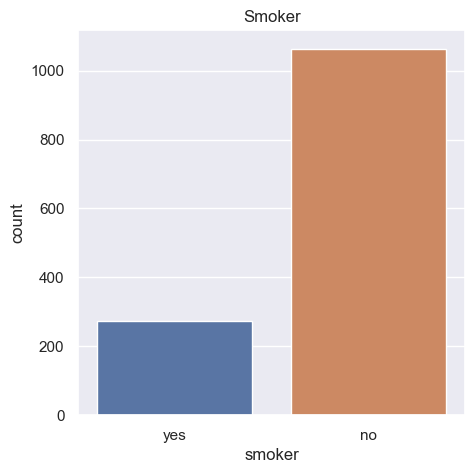

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=Insurance)
plt.title('Smoker')
plt.show()

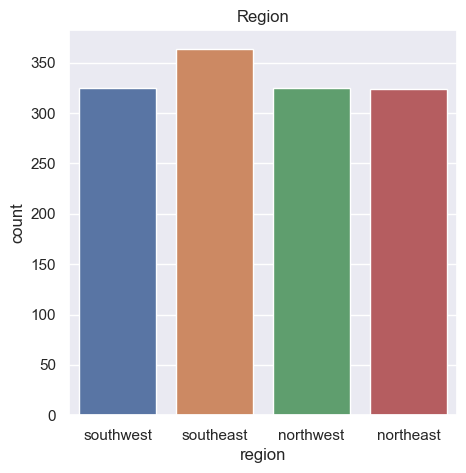

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=Insurance)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Charges for smokers')

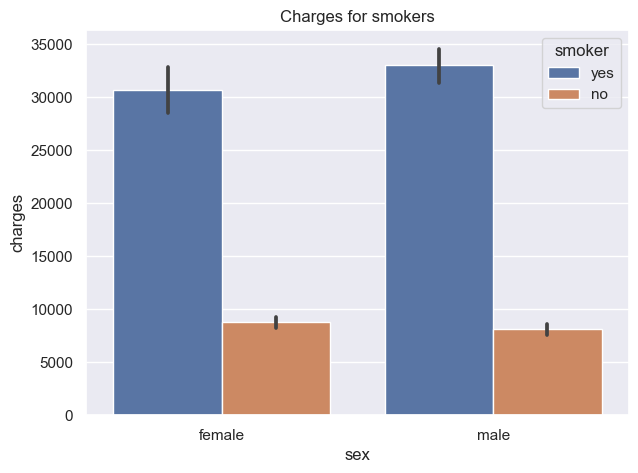

In [18]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=Insurance)
plt.title('Charges for smokers')

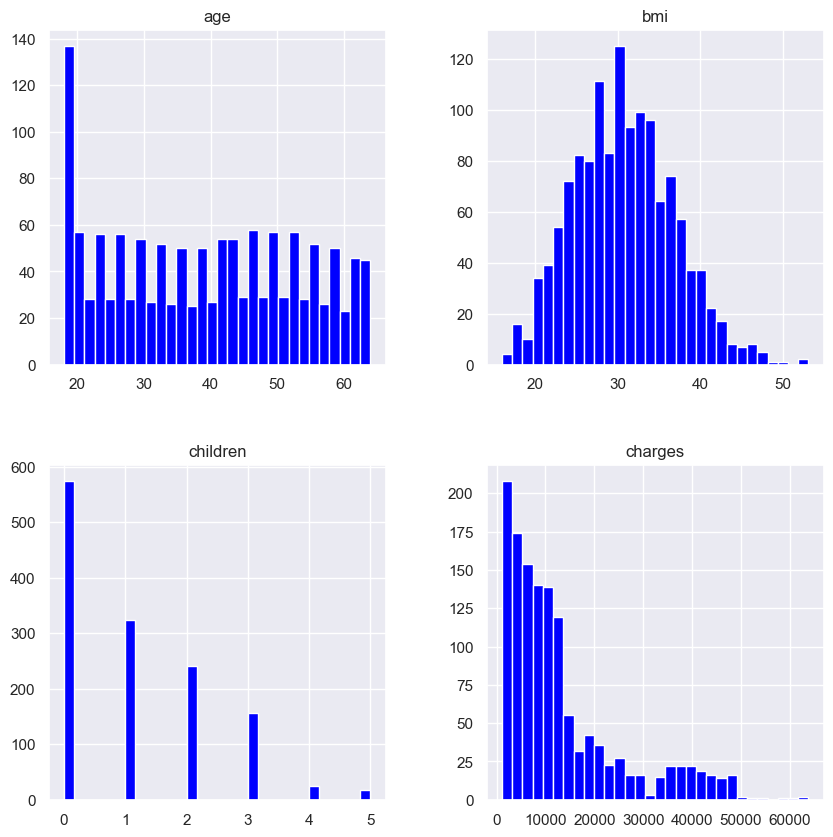

In [19]:
Insurance[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [39]:
Insurance['sex'] = Insurance['sex'].apply({'male':0, 'female':1}.get)
Insurance['smoker'] = Insurance['smoker'].apply({'yes':1, 'no':0}.get)
Insurance['region'] = Insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [40]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [41]:
Insurance.sample(25)

,age,sex,bmi,children,smoker,region,charges
302,56,1,37.510,2,0,2,12265.50690
47,28,1,34.770,0,0,3,3556.92230
314,27,1,31.400,0,1,1,34838.87300
1337,61,1,29.070,0,1,3,29141.36030
1118,33,0,35.750,1,1,2,38282.74950
660,37,0,46.530,3,0,2,6435.62370
1192,58,1,32.395,1,0,4,13019.16105
278,59,0,31.790,2,0,2,12928.79110
552,62,0,21.400,0,0,1,12957.11800
402,64,1,32.965,0,0,3,14692.66935


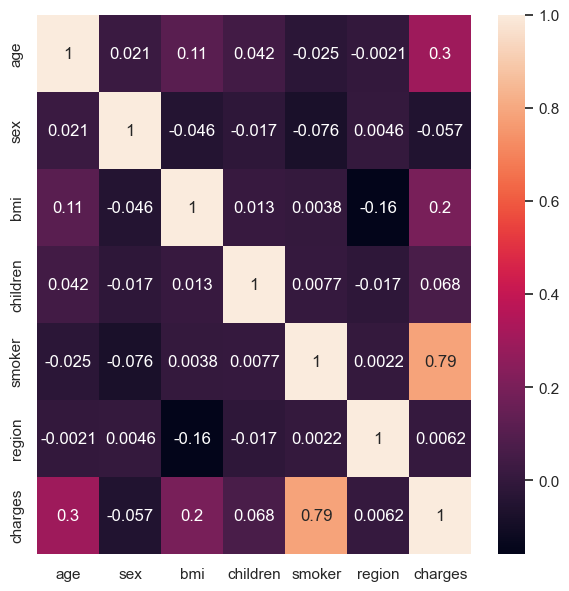

In [45]:
plt.figure(figsize=(7,7))
sns.heatmap(Insurance.corr(), annot = True)
plt.show()

In [42]:
X = Insurance.drop(columns='charges', axis=1)
Y = Insurance['charges']

In [43]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       2
2      28    0  33.000         3       0       2
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       4
1335   18    1  36.850         0       0       2
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [46]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [49]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [50]:
training_data_prediction =regressor.predict(X_train)

In [51]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7519923667088932


In [52]:
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7445422986536503


In [57]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27170.15812436]
The insurance cost is USD  27170.15812435575


In [58]:
input_data = (40,3,30.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[31157.13449697]
The insurance cost is USD  31157.134496967014
